<a href="https://colab.research.google.com/github/laura-turnbull-lloyd/STDH22_23/blob/main/Week_4_practical_1_STDH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical 1: Earthquake frequency-magnitude distributions, probabilities and recurrence intervals

## Introduction
This week you will undertake this self-led practical to explore the frequency-magnitude distributions of earthquakes in southern California, and the likelihood of a magnitude 6.7 and magnitude 8 earthquake occurring over the next 30 years.

##Aims
1. To acquire data from an earthquake catalogue
2. To evaluate whether the  earthquake data are suitable for time-independent analyses
3. To assess the frequency-magnitude relationship and undertake time-independent probability calculation

##Format of the practical
There are a set of tasks that you need to complete below (8 points possible). You also need to write a summary of your findings in a short scientific abstract of no more than 200 words (2 points possible). The abstract should provide a thorough summary of the work undertaken and should be well-written and organised. 

You will answer the questions and write your abstract in this notebook. 

##Submitting the practical
You will submit this work in two forms:
1. You are required to save this notebook as a pdf which you will upload to Turnitin. 
2. You are also required to submit this workbook as a notebook. To do this, please click on the 'share' button (top right corner of this screen). Under 'General Access' change the access from 'Restricted' to 'Anyone with link'. Then copy the link and paste it here:

***Paste your link here:*** 

(note that to add text into a text block, you need to hover your mouse over the text block you want to edit, and double-click)

Please also rename your workbook (Week_4_practical_1.ipynb) so that it contains your name (e.g. Week_4_practical_1_LauraTurnbullLloyd.ipynb).




## Getting started
First, you need to load modules.

In [ ]:
# import modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests
from scipy import stats


##Downloading data
Download data from the USGS using the following parameters:
* format = 'csv'
* starttime = 1994-01-01
* endtime = 2008-01-01
* minlatitude = 33.75
* maxlatitude = 34.75
* minlongitude = -119.20
* maxlongitude = -117.80
* minmagnitude = 1.0


In [ ]:
# add required code here 



## Initial exploration of the data
As always, it is useful to plot the data to check it looks okay, and to check for any patterns. It is best to plot the earthquake time series with time on the x-axis and earthquake magnitude on the y-axis. 

Therefore, to improve plotting of the data, it is useful to convert the time column in the earthquake dataset into a time format recognised by python. You can then plot out the data and have better formatted axes labels showing dates. It also enables you to perform calculations on the date/time information, which you will shortly undertake.


In [ ]:
# to convert the time column into a proper time format:
eq.time = pd.to_datetime(eq.time)
eq.sort_values("time", inplace=True)


In [ ]:
# to plot the data
fig = plt.figure()
plt.plot(eq.time, eq.mag, ".");
plt.ylabel("Magnitude");

## Are large earthquakes clustered?
The typical parameterization of earthquake periodicity or clustering is the Coefficient of Variation (CoV), which is the standard deviation of the interval between earthquakes divided by the mean recurrence interval, and is a straightforward metric for evaluating earthquake spacing where:
* Periodic earthquake distributions have a COV < 1
* Poissonian earthquake distribution have a COV = 1
* Clustered earthquake distributions have a COV > 1


Now, you're in a position to calculate the earthquake COV using the code below:

In [ ]:
# earthquake COV analysis
interarrival = eq.time.diff().dropna().apply(lambda x: x / np.timedelta64(1, "D")) # don't worry about the detail here. This code is basically calculating the time difference between earthquake dates and giving a result in days.

eq_standarddeviation = np.std(interarrival)
eq_mean = np.mean(interarrival)
eq_cov = eq_standarddeviation/eq_mean
print(eq_cov)


### Question 1: What type of behaviour (clustered/Poissonian/periodic) is shown in the earthquake record? What does this type of behaviour mean in terms of time-independent probobability analyses? (1 point, 0.5 for each part of the question)

Double-click to enter your text here

#Cumulative frequency-magnitude distribution
The next step is to inspect the frequency-magnitude distribution. Run the code below to plot out the frequency-magnitude distribution:

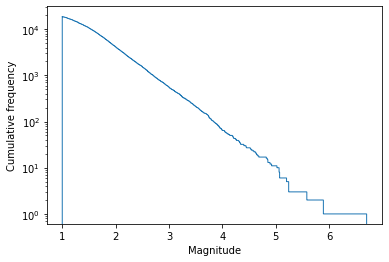

In [ ]:
# show the cumulative frequency-magnitude distribution for the entire dataset
fig, ax = plt.subplots()
ax.hist(
    eq["mag"], bins=len(eq),
    histtype="step", log=True,
    cumulative=-1)
ax.set_xlabel("Magnitude")
ax.set_ylabel("Cumulative frequency")
plt.show()

###Question 2: Looking at the above plot, over what range do the data show an apparent powerlaw distribution? Why does this relation break down at the upper and lower extremes of the data? (1 point, 0.5 for each part of the question)
Double-click to enter your text here

##Rate of earthquakes
You can use the earthquake inventory to determine the expected rate of earthquakes of a given magnitude or above per year. 
To calculate the expected rate, you need to count the number of earthquakes of a given magnitude or above in the dataset, add a new column to the dataframe (called 'rate'), and calculate the rate by dividing the count of earthquakes equal to or above a specific size by the number of years in the dataset. This will return the rate of earthquakes per year of a given magnitude or above.

Recall that you counted the number earthquakes of a specific magnitude in week 2, as detailed below.

In [ ]:
#earthquake rate calculation
from collections import Counter

counted_magnitudes = Counter(eq["mag"])
magnitudes = set(eq["mag"])
magnitudes = sorted(list(magnitudes), reverse=True)
frequency = np.zeros(len(magnitudes))
frequency[0] = counted_magnitudes[magnitudes[0]]
for i, magnitude in enumerate(magnitudes[1:]):
    frequency[i + 1] = frequency[i] + counted_magnitudes[magnitude]

Now you've got the overall frequency of earthquakes for each magnitude, you need to convert this to a rate per year:

In [ ]:
# answer
#enter the calculation here to determine the rate, and save it in a variable called 'rate'


In [ ]:
#plot the data
fig, ax = plt.subplots()
ax.semilogy(magnitudes, rate)
ax.set_ylabel("rate per year N(M>=m)")
ax.set_xlabel("Magnitude")
plt.show()

##Fitting a powerlaw distribution to the data
Recall that the relation between earthquake magnitude and frequency can be given by:

\begin{equation}
    \log_{10}{R} = a - bM
\end{equation}

where *M* is magnitude, *R* is the rate of events with magnitude >= *M*, and *a* and *b* are constants. Note that here were referring to rate, rather than number.

What we are trying to do is find the best match between the predicted rate of earthquakes and the observed rate. Rearrange this equation to solve for R (rather than log(R), where R = rate)

Recall that you need to optimise the fit of the powerlaw distribution by altering the range of earthquake magnitudes (xmin, xmax) over which you fit the powerlaw distribution. 




In [ ]:
# Add values for xmin and xmax below, replacing '999' values
mag_rate = pd.DataFrame({'mag': magnitudes, 'rate': rate}, columns=['mag', 'rate'])

#subsample the dataframe based on a value of xmin and xmax
#replace 999 with a suitable value
mag_rate_subsample = mag_rate[(mag_rate['mag']>999) & (mag_rate['mag']<999)]


Now fit the model to the subsampled data in an attempt to optimise the model fit.
Hint: this is where you fit the model using the np.polyfit function that you used in lecture 2

In [ ]:
# answer


Now visualize the model fit.

In [ ]:
#plot your model (note the variable names might have to change here, depending on what you called them)
fig, ax = plt.subplots()
ax.semilogy(
    magnitudes, rate, marker="+", linestyle="None",
    label="Data")
ax.semilogy(mag_rate_subsample.mag, estimated_density_1, label="Model xmin = 'add number here', xmax = 'add number here'")
#ax.semilogy(magnitudes, estimated_density, label="Model")
ax.set_ylabel("Cumulative density")
ax.set_xlabel("Magnitude")
ax.legend()
plt.show()

##Question 3. What is the best-fitting relationship that you find? Over what magnitude range does this best-fit relationship apply? (2 points; 1 point for the relationship, 1 point for the range)
Double-click to enter your text here

## Probability and recurrence estimation
Your next task is to calculate the time-independent probability and recurrence intervals of an earthquake of at least M 6.7 and M 8 occurring in this region over the next 30 years. Use the code block below to enter your calculations and answer Questions 4 and 5 below. 

Note that you will have to use the optimum a and b parameter values that you derived above to estimate the probability and recurrence intervals of larger earthquakes that are not contained within your dataset.




In [ ]:
# Recurrence interval and probability calculations

# Answer



##Question 4: What is the expected recurrence interval of an earthquake of at least M 6.6 and M 8? (1 point: 0.5 points for each part of the question)
Double-click to enter your text here





##Question 5: What is the time-independent probability of an earthquake of at least M 6.7 and M 8 occurring in this region over the next 30 years? (1 point). How do these values compare with the findings of WGCEP for southern California? (1 point) (See https://pubs.usgs.gov/fs/2015/3009/pdf/fs2015-3009.pdf for summary)

Double-click to enter your text here

##Question 6: Briefly list the assumptions that we have made in estimating the probabilities and recurrence intervals in Questions 3 and 4. (1 point)
Double-click to enter your text here

## Final task
Summarise your findings in a brief (no more than 200 words) abstract. This should be a summary that is thorough and covers all the material (1 point), and that is well-written and well-organised (1 point)

## Abstract

Double-click to enter your text here